# Predicting Physical Activities from Smartphone Accelerometer Data: A Machine Learning Approach

In [1]:
pwd # to see if the file directory has the correct address

'/home/egeozmeral/Desktop/Python/Using Python for Research/Final Project'

In [2]:
#from sklearn.model_selection import train_test_split
#import scipy.stats as ss

In [3]:
from timeit import default_timer as timer

start = timer()
end = timer()
print(end - start)

2.6700000489654485e-05


## Load Data

In [4]:
import pandas as pd

train_time_series = pd.read_csv("train_time_series.csv")

print(len(train_time_series))
train_time_series.head()

3744


,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [5]:
train_labels = pd.read_csv("train_labels.csv")

train_labels.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


## Data Cleaning

In [6]:
print(train_time_series.isnull().sum())

Unnamed: 0    0
timestamp     0
UTC time      0
accuracy      0
x             0
y             0
z             0
dtype: int64


In [7]:
print(train_labels.isnull().sum())

Unnamed: 0    0
timestamp     0
UTC time      0
label         0
dtype: int64


We see that both data frames have no null values.

To merge both data frames, we use **pandas.merge** on 'timestamp' column

In [8]:
merged_data = pd.merge(train_time_series, train_labels, on="timestamp", how="inner")
print(len(merged_data))
merged_data.head()

375


,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1


$$ \text{normalized } x = \frac{x-min(x)}{max(x)-min(x)} $$

In [9]:
x = merged_data["x"]; y = merged_data["y"]; z = merged_data["z"] 

nm_x = (x-min(x))/(max(x) - min(x))
nm_y = (y-min(y))/(max(y) - min(y))
nm_z = (z-min(z))/(max(z) - min(z))

merged_data['x'] = nm_x; merged_data['y'] = nm_y; merged_data['z'] = nm_z

nm_merged_data = merged_data

nm_merged_data.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,0.305676,0.595996,0.440649,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.331169,0.637750,0.417291,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.380956,0.589782,0.405271,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,0.288468,0.527508,0.519396,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.357249,0.591759,0.409097,20629,2019-08-06T16:45:35.097,1


## Visualization

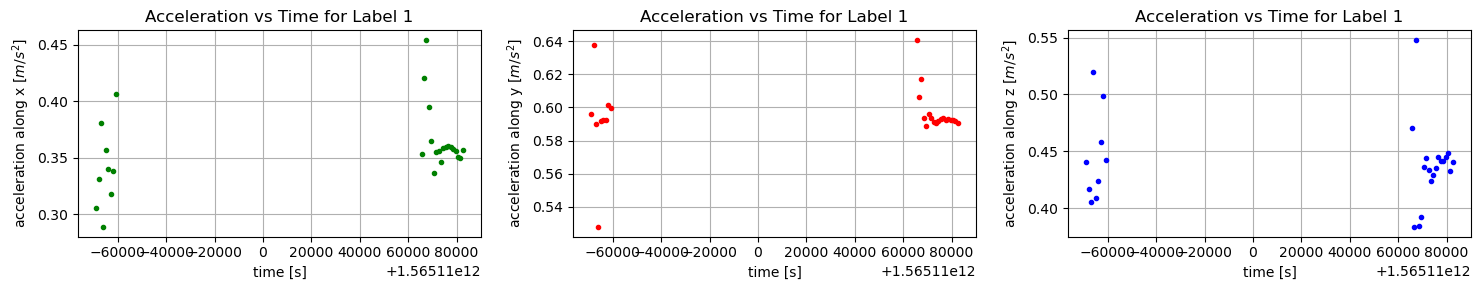

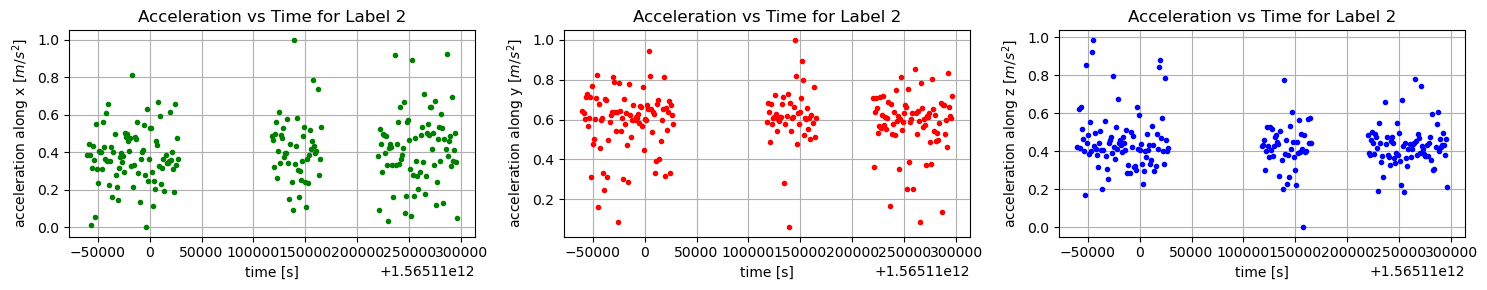

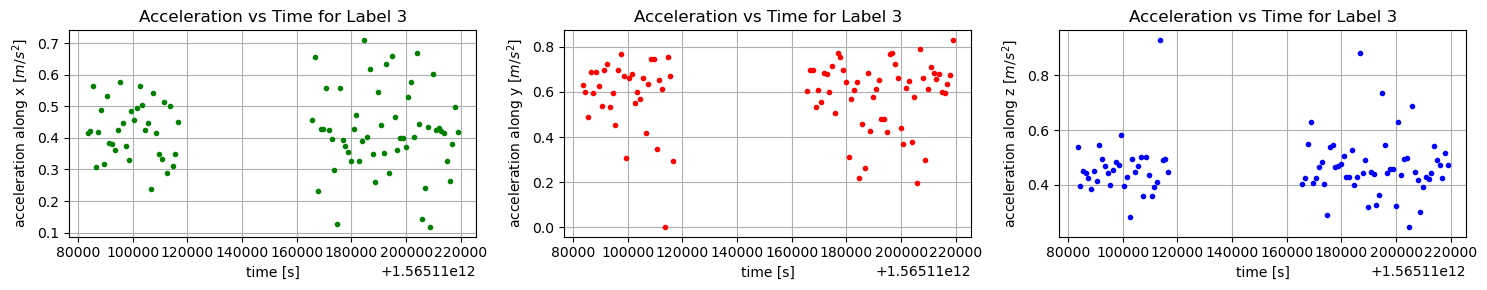

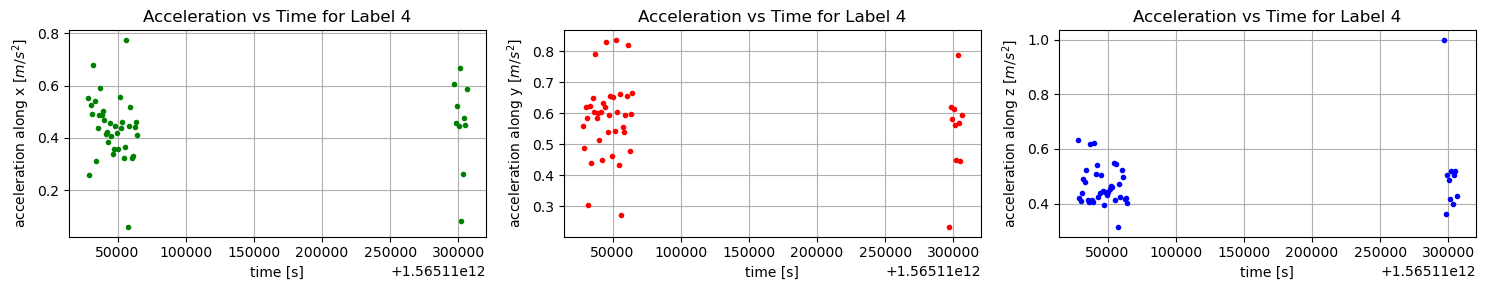

In [10]:
import matplotlib.pyplot as plt

labels = [1,2,3,4]
colors = ['g.', 'r.', 'b.']
ax_labels = ['x','y','z']
for i in labels:
    label = nm_merged_data[nm_merged_data["label"]== i]
    t = label["timestamp"]; x = label["x"]; y = label["y"]; z = label["z"]
    acc = [x, y, z]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    for j in range(len(colors)):
        axes[j].plot(t,acc[j],colors[j])
        axes[j].set_title("Acceleration vs Time for Label "+str(i))
        axes[j].set_ylabel('acceleration along '+ ax_labels[j] +' [$m/s^2$]')
        axes[j].set_xlabel('time [s]')
        axes[j].grid()
        
    plt.tight_layout()
    plt.show()    

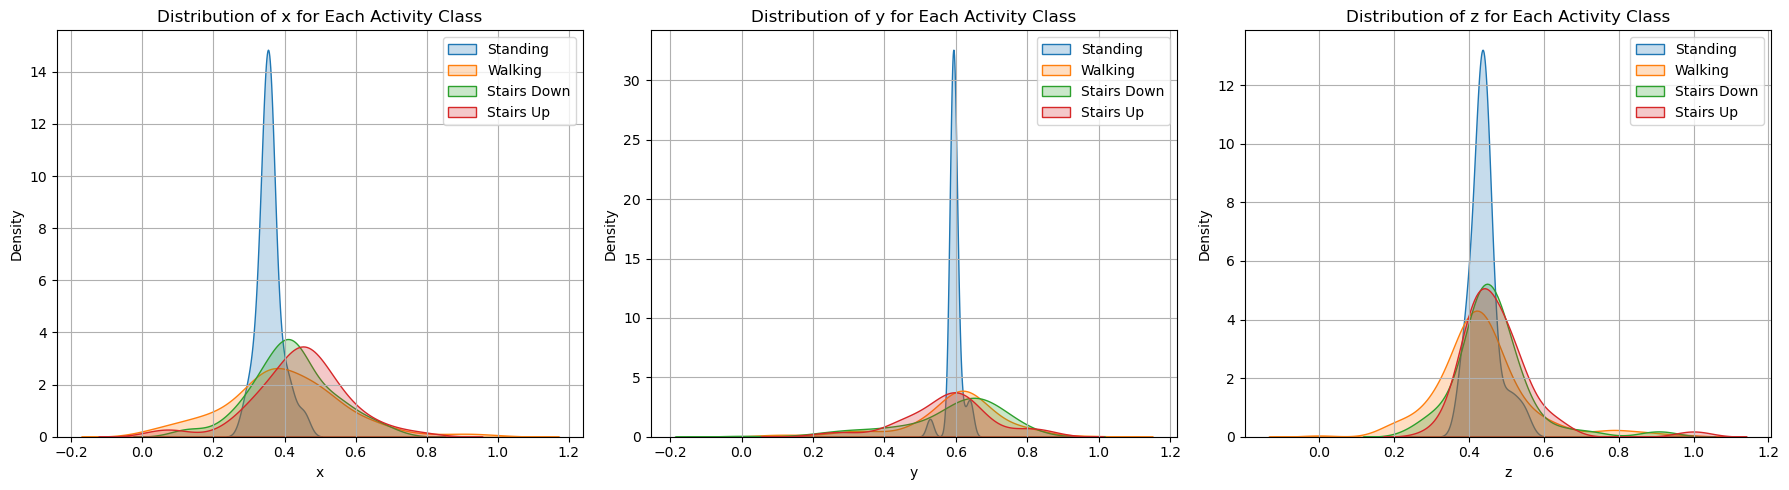

In [11]:
import seaborn as sns

features = ['x', 'y', 'z']
activity_classes = {1: 'Standing', 2: 'Walking', 3: 'Stairs Down', 4: 'Stairs Up'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    for label, activity in activity_classes.items():
        sns.kdeplot(
            merged_data[merged_data['label'] == label][feature],label=activity,fill=True,ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} for Each Activity Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

## Correlation Analysis

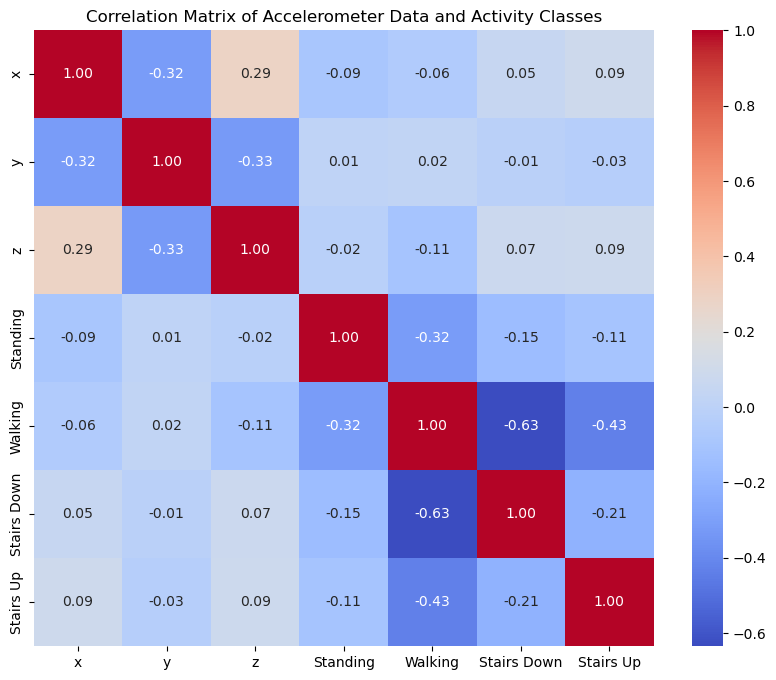

In [12]:
cols = ['x','y','z','label']
df = nm_merged_data[cols]
corr_df = df.corr()

for activity, activity_name in activity_classes.items():
    nm_merged_data[activity_name] = (nm_merged_data['label'] == activity).astype(int)

# Select relevant columns: 'x', 'y', 'z' and the new activity class columns
cols = ['x', 'y', 'z'] + list(activity_classes.values())

df = nm_merged_data[cols]

corr_df = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Matrix of Accelerometer Data and Activity Classes')
plt.savefig("corr_acc_labels.png")
plt.show()

## Frequency Domain Analysis

### **Frequency Domain Analysis**

In this step, we analyze the frequency domain to uncover periodic patterns in the accelerometer data. This is especially useful for distinguishing activities like walking, which often exhibit periodic or cyclical behavior.

1. **Fourier Transform (FFT)**:

* Apply the Fast Fourier Transform (FFT) to the accelerometer signals (x, y, z). This will allow us to observe the frequency components of each signal.

* The FFT transforms the time-series data into the frequency domain, providing insights into the dominant frequencies present in the accelerometer readings.

2. **Visualize Frequency Components**:

* Plot the **frequency spectrum** for each of the accelerometer axes (x, y, z).
* Observe the frequencies with the highest magnitude, as they often correspond to periodic motion patterns like walking or climbing stairs.

3. **Frequency Domain Features**:

* Extract key features from the frequency domain:
    * **Dominant frequency**: The frequency with the highest amplitude, which can indicate periodic motion.
    * **Spectral energy**: The total energy of the signal in the frequency domain.
    * **Power Spectral Density (PSD)**: The distribution of power across frequencies, which can help distinguish different activities.

4. **Activity Classification**:

* Use the frequency-domain features in combination with time-domain features (like mean, standard deviation, etc.) for better classification performance.
* It may be beneficial to aggregate frequency-domain features over sliding windows (e.g., 2-5 seconds) to capture periodic patterns in the data.

By analyzing the frequency components of the accelerometer signals, we can uncover hidden patterns that help differentiate between physical activities like walking, standing, or climbing stairs.

1. Apply Fast Fourier Transform (FFT) to convert the accelerometer data (x, y, z) from the time domain to the frequency domain.

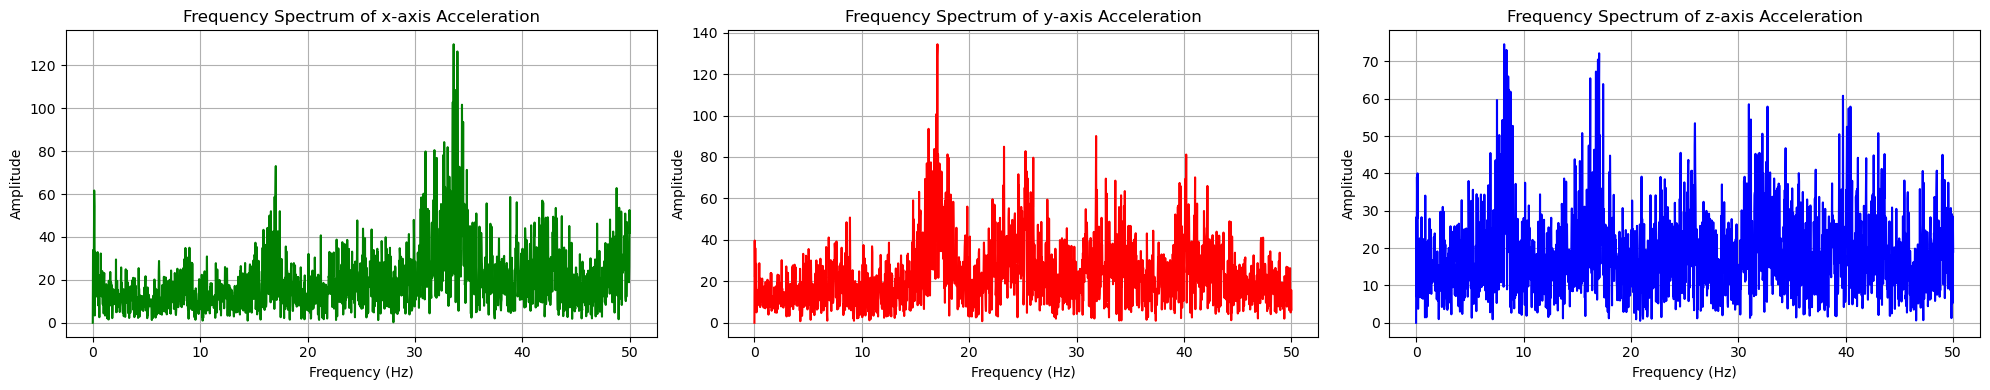

[33.6, 17.04, 8.2]


In [55]:
import numpy as np

dominant_freqs = []

colors = ['g', 'r', 'b']
ax_labels = ['x','y','z']

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

for i in range(3):
    dir = train_time_series[ax_labels[i]].values
    n = len(dir)
    sampling_rate = 100
    time = np.arange(n) / sampling_rate
    fft_vals = np.fft.rfft(dir)
    fft_freqs = np.fft.rfftfreq(n, d=1/sampling_rate)
    fft_vals[0] = 0 # Exclude DC component

    # Find the dominant frequency for each ax_label
    dominant_freq_index = np.argmax(np.abs(fft_vals))
    dominant_freq = fft_freqs[dominant_freq_index]
    dominant_freq = float("%.2f"%dominant_freq) # I only need 2 decimal numbers
    dominant_freqs.append(dominant_freq)

    # plot
    axes[i].plot(fft_freqs, np.abs(fft_vals), colors[i])
    axes[i].set_title("Frequency Spectrum of "+ax_labels[i]+"-axis Acceleration")
    axes[i].set_xlabel("Frequency (Hz)")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid()
    plt.savefig("Amplitude vs Frequency.png")
plt.tight_layout()
plt.show()

print(dominant_freqs)

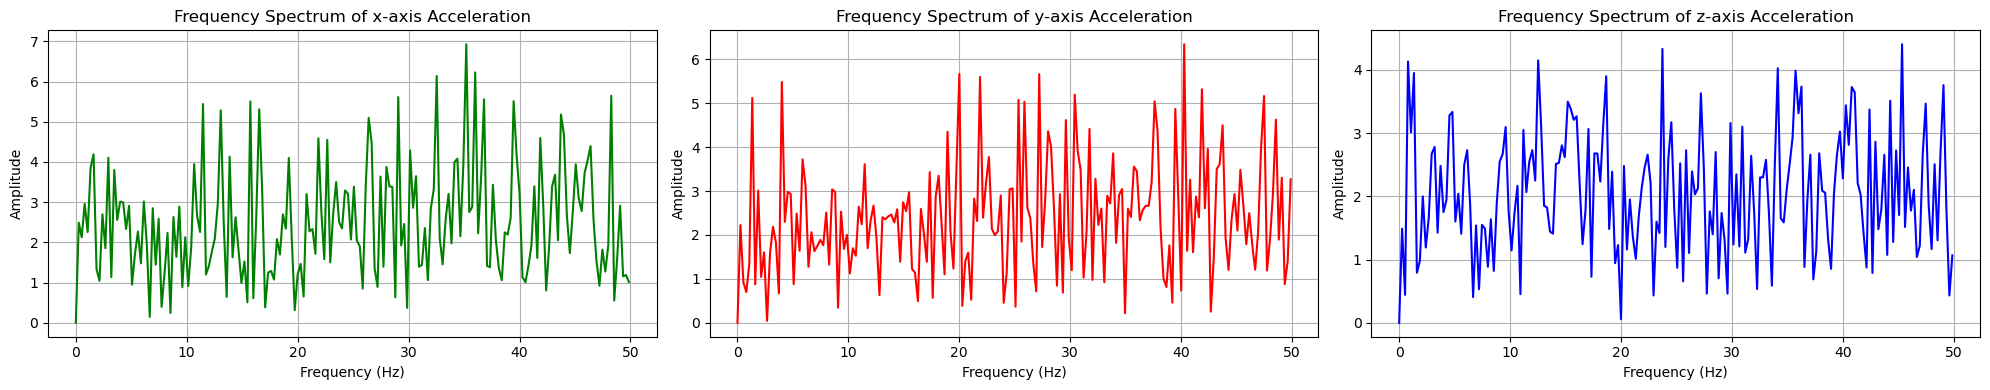

[35.2, 40.27, 45.33]


In [16]:
dominant_freqs = []

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
colors = ['g', 'r', 'b']
ax_labels = ['x','y','z']

for i in range(3):
    dir = nm_merged_data[ax_labels[i]].values
    n = len(dir)
    sampling_rate = 100
    time = np.arange(n) / sampling_rate
    fft_vals = np.fft.rfft(dir)
    fft_freqs = np.fft.rfftfreq(n, d=1/sampling_rate)
    fft_vals[0] = 0 # Exclude DC component

    # Find the dominant frequency for each ax_label
    dominant_freq_index = np.argmax(np.abs(fft_vals))
    dominant_freq = fft_freqs[dominant_freq_index]
    dominant_freq = float("%.2f"%dominant_freq) # I only need 2 decimal numbers
    dominant_freqs.append(dominant_freq)

    # plot
    axes[i].plot(fft_freqs, np.abs(fft_vals), colors[i])
    axes[i].set_title("Frequency Spectrum of "+ax_labels[i]+"-axis Acceleration")
    axes[i].set_xlabel("Frequency (Hz)")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid()
    plt.savefig("Amplitude vs Frequency.png")
plt.tight_layout()
plt.show()

print(dominant_freqs)

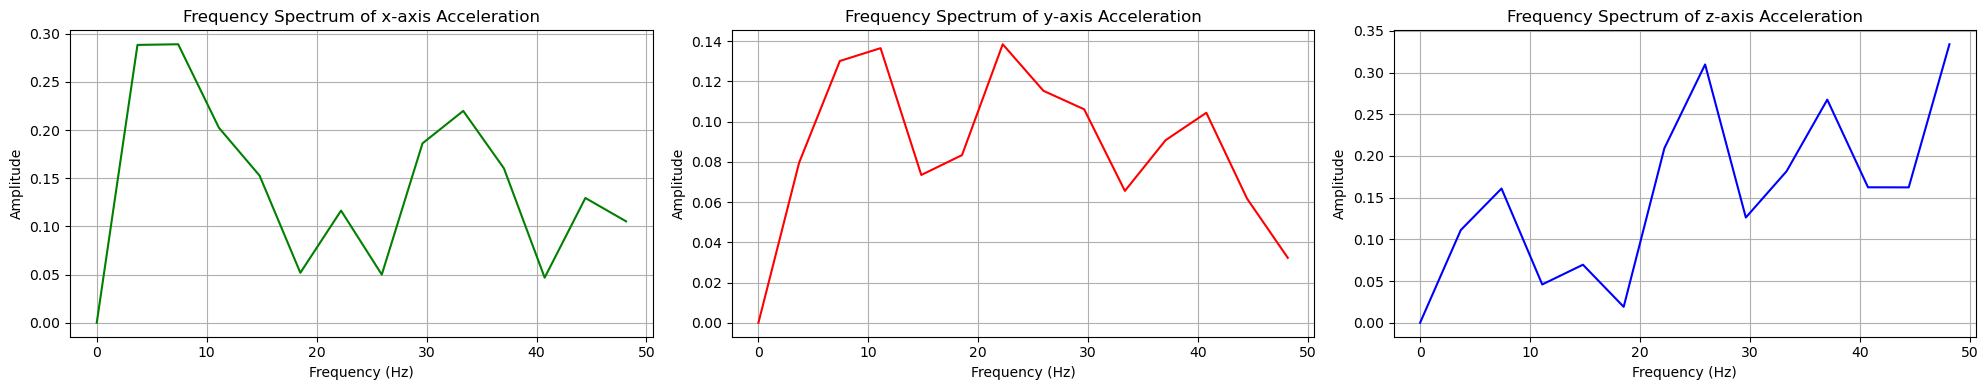

[7.41, 22.22, 48.15]


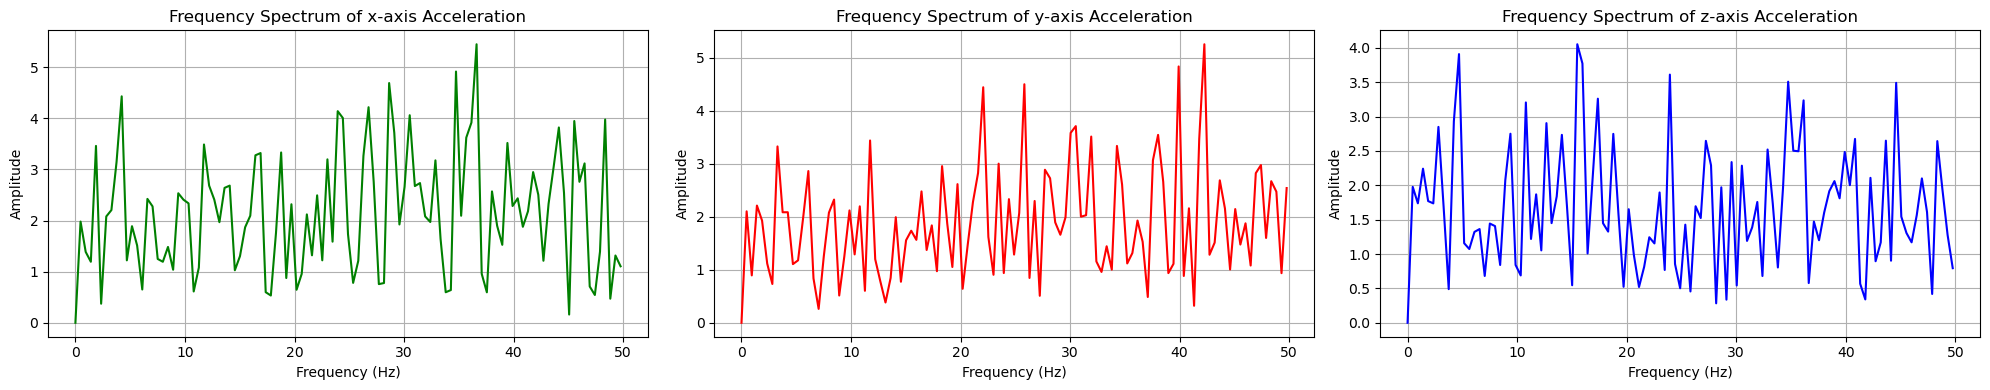

[36.62, 42.25, 15.49]


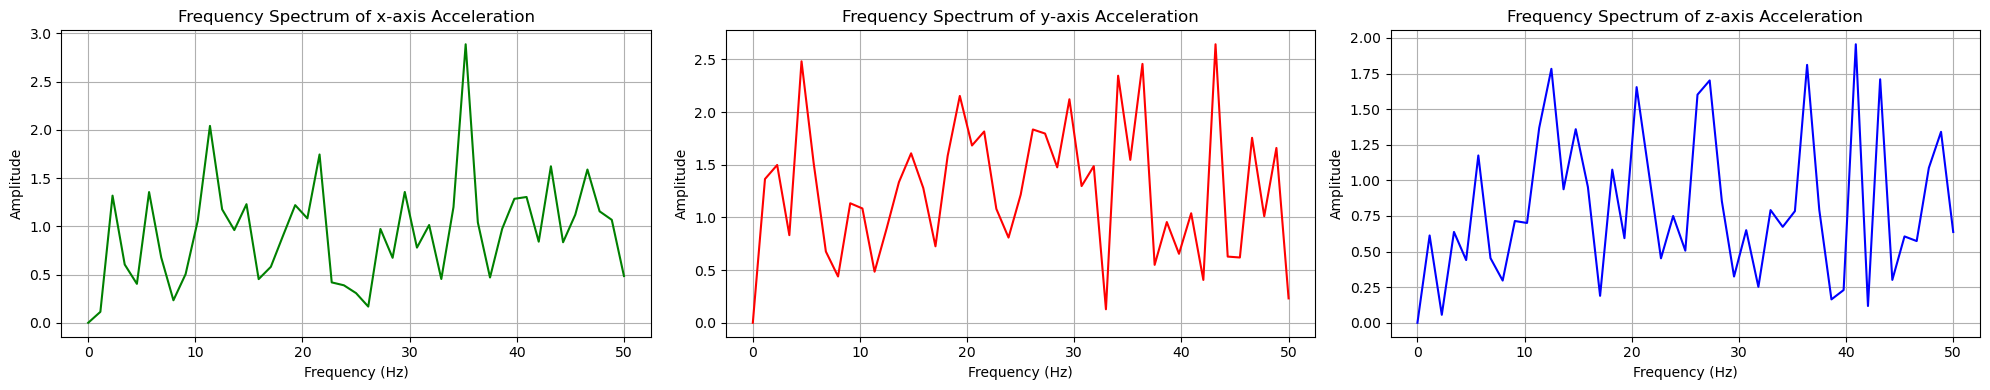

[35.23, 43.18, 40.91]


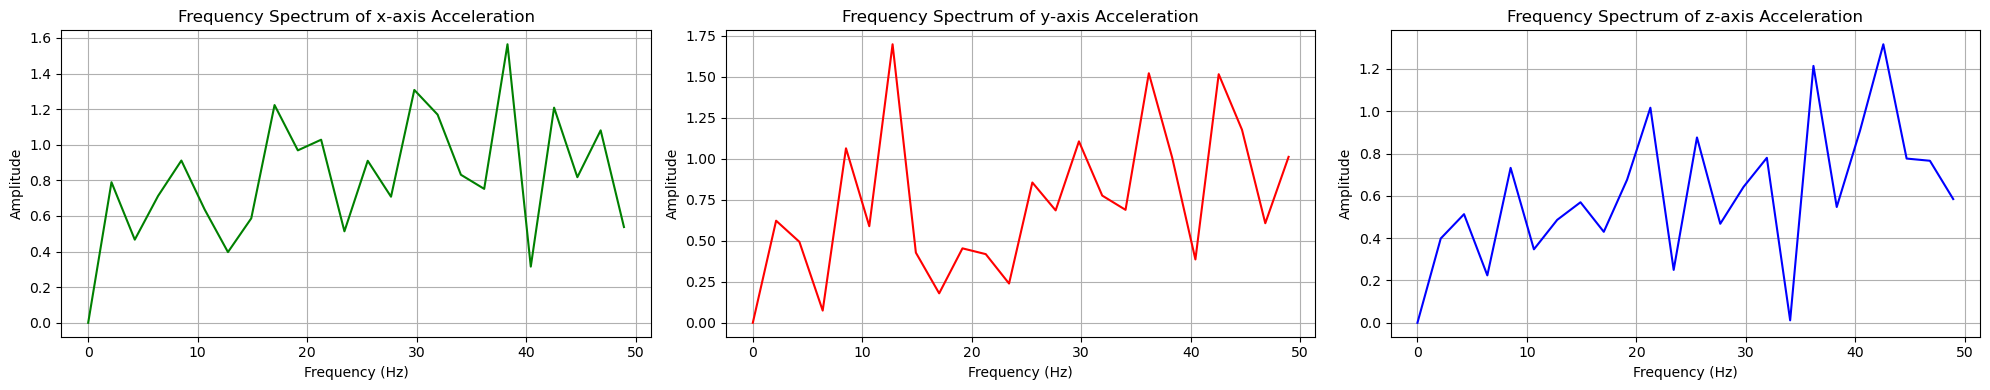

[38.3, 12.77, 42.55]


In [59]:
colors = ['g', 'r', 'b']
ax_labels = ['x','y','z']

labels = [1,2,3,4]
for i in labels:
    dominant_freqs = []

    df = nm_merged_data[nm_merged_data['label'] == i]

    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    
    for j in range(3):
        dir = df[ax_labels[j]].values
        n = len(dir)
        sampling_rate = 100
        time = np.arange(n) / sampling_rate
        fft_vals = np.fft.rfft(dir)
        fft_freqs = np.fft.rfftfreq(n, d=1/sampling_rate)
        fft_vals[0] = 0 # Exclude DC component

        # Find the dominant frequency for each ax_label
        dominant_freq_index = np.argmax(np.abs(fft_vals))
        dominant_freq = fft_freqs[dominant_freq_index]
        dominant_freq = float("%.2f"%dominant_freq) # I only need 2 decimal numbers
        dominant_freqs.append(dominant_freq)

        # plot
        axes[j].plot(fft_freqs, np.abs(fft_vals), colors[j])
        axes[j].set_title("Frequency Spectrum of "+ax_labels[j]+"-axis Acceleration")
        axes[j].set_xlabel("Frequency (Hz)")
        axes[j].set_ylabel("Amplitude")
        axes[j].grid()
        
    plt.tight_layout()
    plt.savefig("Amplitude vs Frequency_{i}.png")
    plt.show()

    print(dominant_freqs)

**Extract Frequency Features**

For each axis (x, y, z):
* Calculate the dominant frequency (the frequency with the maximum amplitude).
* Compute the energy of the signal in specific frequency bands (e.g., low-frequency vs. high-frequency ranges).
* Identify spectral entropy to quantify the signal's regularity.

## Statistical Summary

In [ ]:
mean_x = x.mean(); mean_y = y.mean(); mean_z = z.mean()
print(mean_x, mean_y, mean_z)

std_x = x.std(); std_y = y.std(); std_z = z.std()
print(std_x, std_y, std_z)

median_x = x.median(); median_y = y.median(); median_z = z.median()
print(median_x, median_y, median_z)

## Visualization

In [ ]:
merged_data.head()

In [ ]:
merged_data.head()

cols = merged_data.columns.tolist()
# cols: columns of the data frame merged_data

cols = cols[:-3] + cols[-1:]
# cols[:-3]: columns without the last 3 columns
# cols[-1:] the last column

df = merged_data[cols]
df = df.iloc[:, 4:] # the last 4 columns of df
df

In [ ]:
df['standing'] = df['label'].apply(lambda x: 1 if x == 1 else 0)
df['walking'] = df['label'].apply(lambda x: 1 if x == 2 else 0)
df['stairs down'] = df['label'].apply(lambda x: 1 if x == 3 else 0)
df['stairs up'] = df['label'].apply(lambda x: 1 if x == 4 else 0)
df.drop(columns=['label'], inplace=True)
df

In [ ]:
corr_df = pd.DataFrame.corr(df)
corr_df

**The most significant correlation is between z-label and x-label**

In [ ]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_df)
plt.colorbar()
plt.savefig("corr_acc-labels")
plt.show()

In [ ]:
df = merged_data['label']

df = df.reset_index(drop=True)

df

In [ ]:
mean_x = train_time_series['x'].mean()
mean_y = train_time_series['y'].mean()
mean_z = train_time_series['z'].mean()
print(mean_x, mean_y, mean_z)

std_x = train_time_series['x'].std()
std_y = train_time_series['y'].std()
std_z = train_time_series['z'].std()
print(std_x, std_y, std_z)

median_x = train_time_series['x'].median()
median_y = train_time_series['y'].median()
median_z = train_time_series['z'].median()
print(median_x, median_y, median_z)

In [ ]:
test_time_series = pd.read_csv("test_time_series.csv")

test_time_series

In [ ]:
test_labels = pd.read_csv("test_labels.csv")

test_labels